In [56]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, regularizers
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Check for null values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


Since we don't have missing values, we are good to go!

In [4]:
# renane columns
df = df.rename(columns={
    'family_history_with_overweight': 'Family_History_With_Overweight',
    'FAVC': 'Frequent_Consume_High_Calorie_Food',
    'FCVC': 'Frequency_Consume_Vegetables',
    'CAEC': 'Frequency_Consume_Food_Between_Meals',
    'SMOKE': 'Smoker',
    'NCP': 'Number_of_Main_Meals',
    'CH2O': 'Daily_Water_Consumption',
    'SCC': 'Monitring_Calorie_Intake',
    'FAF': 'Physical_Activity_Frequency',
    'TUE': 'Time_Using_Electronics_Devices',
    'CALC': 'Frequent_Consume_Alcohol',
    'MTRANS': 'Transportation_Used',
    'NObeyesdad': 'Obesity_Level'
})

In [5]:
# dataset description
df.describe()

,Age,Height,Weight,Frequency_Consume_Vegetables,Number_of_Main_Meals,Daily_Water_Consumption,Physical_Activity_Frequency,Time_Using_Electronics_Devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
# Pre-processing for weight level label
for i in df.index:
    if df.loc[i, 'Obesity_Level'].startswith('Obesity'):
        df.loc[i, 'Obesity_Level'] = 'Obesity'
    elif df.loc[i, 'Obesity_Level'].startswith('Overweight'):
        df.loc[i, 'Obesity_Level'] = 'Overweight'
    elif df.loc[i, 'Obesity_Level'].startswith('Normal'):
        df.loc[i, 'Obesity_Level'] = 'Normal'
    elif df.loc[i, 'Obesity_Level'].startswith('Insufficient'):
        df.loc[i, 'Obesity_Level'] = 'Insufficient_Weight'

In [7]:
print(f' There are {len(df)} rows and {len(df.columns)} columns in this dataset')

 There are 2111 rows and 17 columns in this dataset


# Data Preprocessing

In [8]:
# Rescaling data
df['Number_of_Main_Meals'] = df['Number_of_Main_Meals'].round(0)
df['Physical_Activity_Frequency'] = df['Physical_Activity_Frequency'].round(0)
df['Time_Using_Electronics_Devices'] = df['Time_Using_Electronics_Devices'].round(1)

In [9]:
# Encode and normalization
label = LabelEncoder()
scaler = StandardScaler()


df_copy = df.copy()

df_copy['Gender'] = label.fit_transform(df_copy[['Gender']])
df_copy['Age'] = scaler.fit_transform(df_copy[['Age']])
df_copy['Height'] = scaler.fit_transform(df_copy[['Height']])
df_copy['Weight'] = scaler.fit_transform(df_copy[['Weight']])
df_copy['Family_History_With_Overweight'] = label.fit_transform(df_copy[['Family_History_With_Overweight']])
df_copy['Frequent_Consume_High_Calorie_Food'] = label.fit_transform(df_copy[['Frequent_Consume_High_Calorie_Food']])
df_copy['Frequency_Consume_Vegetables'] = scaler.fit_transform(df_copy[['Frequency_Consume_Vegetables']])
df_copy['Number_of_Main_Meals'] = label.fit_transform(df_copy[['Number_of_Main_Meals']])
df_copy['Frequency_Consume_Food_Between_Meals'] = label.fit_transform(df_copy[['Frequency_Consume_Food_Between_Meals']])
df_copy['Smoker'] = label.fit_transform(df_copy[['Smoker']])
df_copy['Daily_Water_Consumption'] = scaler.fit_transform(df_copy[['Daily_Water_Consumption']])
df_copy['Monitring_Calorie_Intake'] = label.fit_transform(df_copy[['Monitring_Calorie_Intake']])
df_copy['Physical_Activity_Frequency'] = label.fit_transform(df_copy[['Physical_Activity_Frequency']])
df_copy['Time_Using_Electronics_Devices'] = scaler.fit_transform(df_copy[['Time_Using_Electronics_Devices']])
df_copy['Frequent_Consume_Alcohol'] = label.fit_transform(df_copy[['Frequent_Consume_Alcohol']])
df_copy['Transportation_Used'] = label.fit_transform(df_copy[['Transportation_Used']])
df_copy['Obesity_Level'] = label.fit_transform(df_copy[['Obesity_Level']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [10]:
# function for chi square test
def chi2_test_relationship(df, independent_name, dependent_name,  threshold=0.05):
    print(f"Chi2 square test on relationship between {independent_name} and {dependent_name}")
    print("---------------------------------------------------------------------------")

    contingency_table = pd.crosstab(df[independent_name], df[dependent_name])

    print("Contingency table:")
    print(contingency_table)
    print()

    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nChi-square Statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}")

    print()
    print(f"H0: There is no relationship between {independent_name} and {dependent_name}")
    print(f"H1: There is a relationship between {independent_name} and {dependent_name}")

    print()
    if p_value > threshold:
        print(f"""Since the p-value is larger than the alpha value (0.05), there is insufficient evidence to prove
that there is a relationship between {independent_name} and {dependent_name}. Hence, we don't reject H0.""")
    else:
        print(f"""Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between {independent_name} and {dependent_name}. Hence, we reject H0.""")

    return contingency_table, chi2, p_value, dof, expected


In [11]:
# function for tukey test on post hoc test for chi square
def calculate_adjusted_residuals(contingency_table, expected, independent_name, dependent_name):
    expected = expected.flatten()

    observed = contingency_table.values.flatten()

    residuals = observed - expected

    adjusted_residuals = residuals / np.sqrt(expected)

    adjusted_residuals_df = pd.DataFrame({
        'Observed': observed,
        'Adjusted Residuals': adjusted_residuals
    })

    adjusted_residuals_df.index = pd.MultiIndex.from_product(
        [contingency_table.index, contingency_table.columns],
        names=[independent_name, dependent_name]
    )

    significant_residuals = adjusted_residuals_df[abs(adjusted_residuals_df['Adjusted Residuals']) > 2]

    print(significant_residuals)

    return significant_residuals

In [12]:
# function for anova test
def anova_test_relationship(df, independent_name, dependent_name, threshold=0.05):
    print(f"One-way ANOVA test on relationship between {independent_name} and {dependent_name}")
    print("---------------------------------------------------------------------------")

    unique_levels = df[dependent_name].unique()

    groups = []

    for level in unique_levels:
        groups.append(df[df[dependent_name] == level][independent_name])

    f_value, p_value = stats.f_oneway(*groups)

    print("F-statistic:", f_value)
    print("p-value:", p_value)

    print()
    print(f"H0: There is no relationship between {independent_name} and {dependent_name}")
    print(f"H1: There is a relationship between {independent_name} and {dependent_name}")

    print()
    if p_value > threshold:
        print(f"""Since the p-value is larger than the alpha value ({threshold}), there is insufficient evidence to prove
that there is a relationship between {independent_name} and {dependent_name}. Hence, we don't reject H0.""")
    else:
        print(f"""Since the p-value is smaller than the alpha value ({threshold}), there is sufficient evidence to prove
that there is a relationship between {independent_name} and {dependent_name}. Hence, we reject H0.""")

    return f_value, p_value

In [13]:
# function for tukey test on post hoc test for anova
def tukey_hsd_test(df, dependent_name, independent_name):
    print(f"Tukey's HSD test on {dependent_name} by {independent_name}")
    print("---------------------------------------------------------------------------")

    tukey_results = pairwise_tukeyhsd(endog=df[dependent_name], groups=df[independent_name])

    print(tukey_results.summary())

    return tukey_results

Since our dataset contains 16 questions along with 1 question on obesity level, the 16 questions were divided into 3 sections based on the question aspect - Dietary Habits, Lifestyle Habits and Demographic Factors

# Dietary Habits

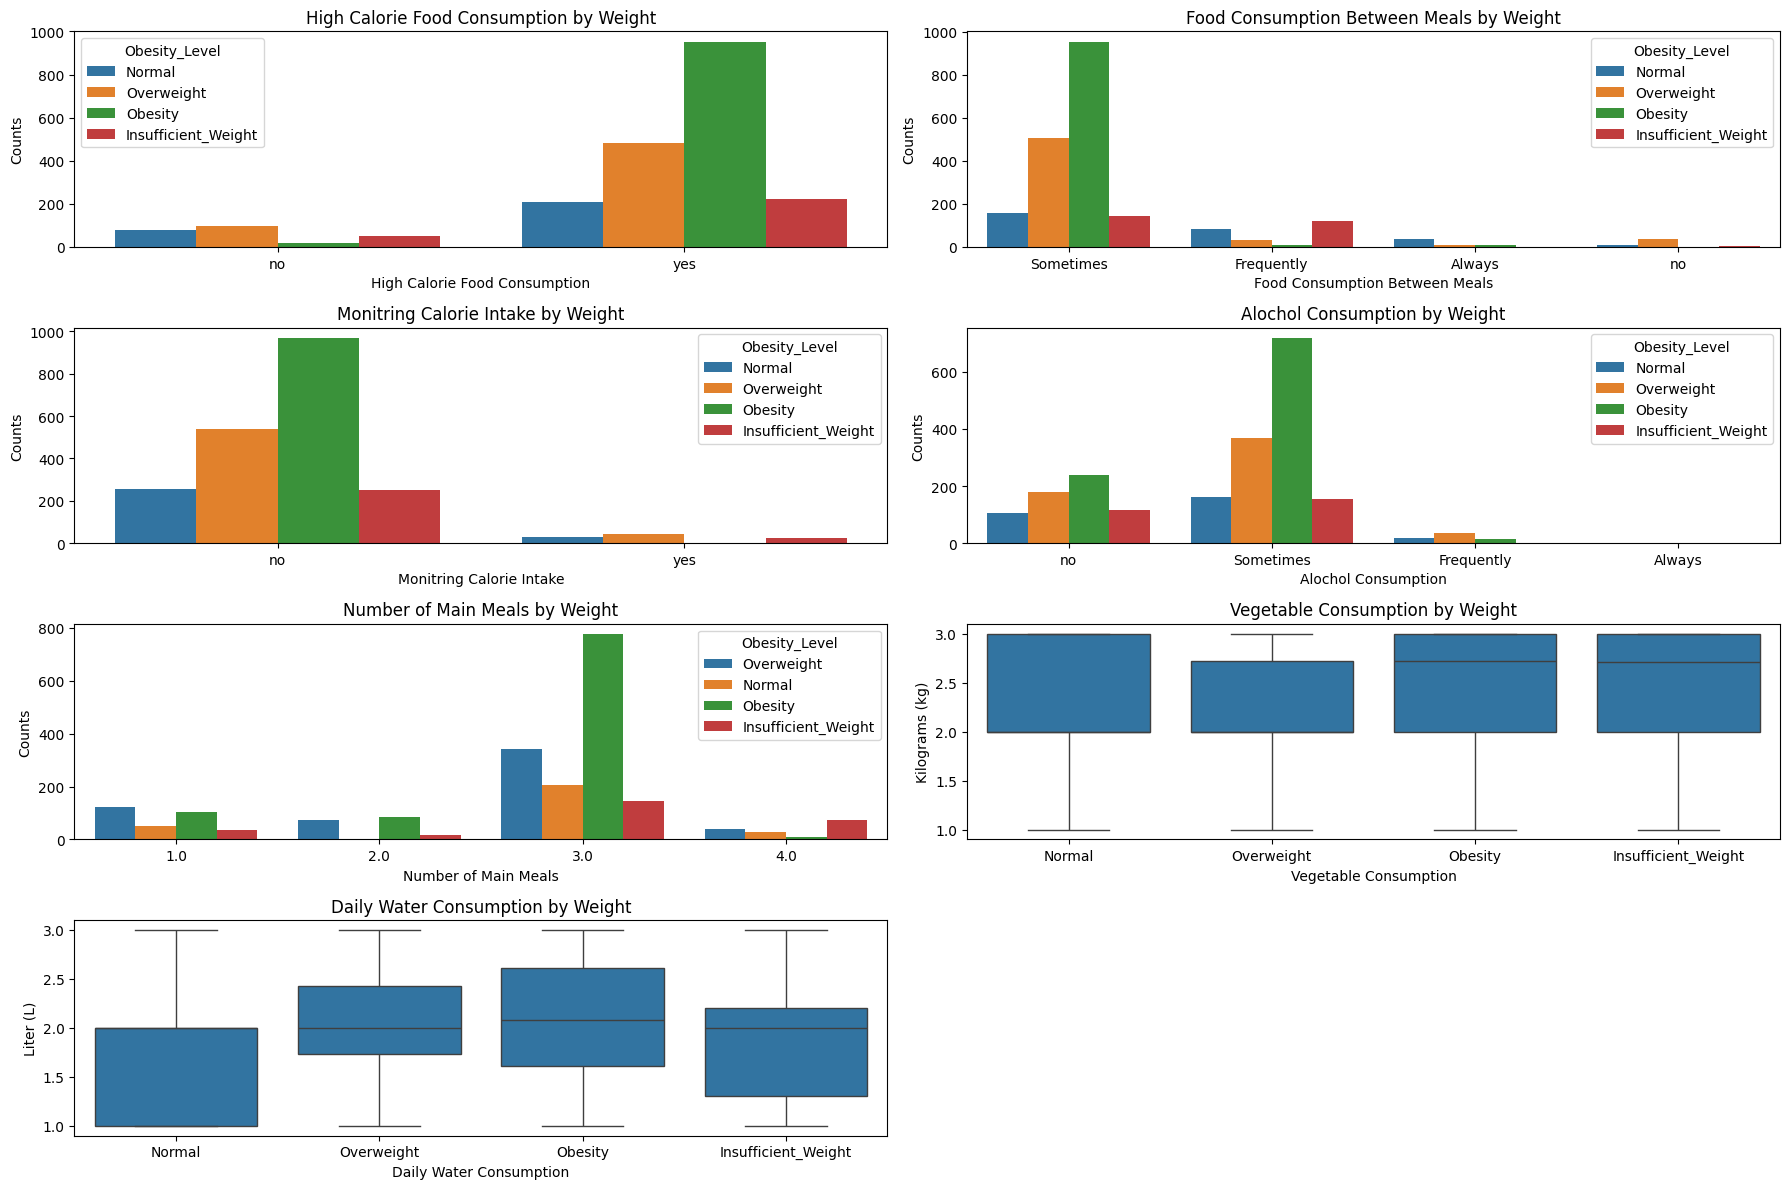

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(18, 12))

sns.countplot(data=df, x='Frequent_Consume_High_Calorie_Food', hue='Obesity_Level', ax=ax[0][0])
ax[0][0].set_title('High Calorie Food Consumption by Weight')
ax[0][0].set_xlabel('High Calorie Food Consumption')
ax[0][0].set_ylabel('Counts')



sns.countplot(data=df, x='Frequency_Consume_Food_Between_Meals', hue='Obesity_Level', ax=ax[0][1])
ax[0][1].set_title('Food Consumption Between Meals by Weight')
ax[0][1].set_xlabel('Food Consumption Between Meals')
ax[0][1].set_ylabel('Counts')


sns.countplot(data=df, x='Monitring_Calorie_Intake', hue='Obesity_Level', ax=ax[1][0])
ax[1][0].set_title('Monitring Calorie Intake by Weight')
ax[1][0].set_xlabel('Monitring Calorie Intake')
ax[1][0].set_ylabel('Counts')


sns.countplot(data=df, x='Frequent_Consume_Alcohol', hue='Obesity_Level', ax=ax[1][1])
ax[1][1].set_title('Alochol Consumption by Weight')
ax[1][1].set_xlabel('Alochol Consumption')
ax[1][1].set_ylabel('Counts')


sns.countplot(data=df, x='Number_of_Main_Meals', hue='Obesity_Level', ax=ax[2][0])
ax[2][0].set_title('Number of Main Meals by Weight')
ax[2][0].set_xlabel('Number of Main Meals')
ax[2][0].set_ylabel('Counts')


sns.boxplot(data=df, y='Frequency_Consume_Vegetables', x='Obesity_Level', ax=ax[2][1])
ax[2][1].set_title('Vegetable Consumption by Weight')
ax[2][1].set_xlabel('Vegetable Consumption')
ax[2][1].set_ylabel('Kilograms (kg)')


sns.boxplot(data=df, y='Daily_Water_Consumption', x='Obesity_Level', ax=ax[3][0])
ax[3][0].set_title('Daily Water Consumption by Weight')
ax[3][0].set_xlabel('Daily Water Consumption')
ax[3][0].set_ylabel('Liter (L)')

ax[3][1].axis('off')

plt.tight_layout()
plt.show()

In [15]:
high_calorie_contingency_table, high_calorie_chi2, high_calorie_p_value, high_calorie_dof, high_calorie_expected = chi2_test_relationship(df, 'Frequent_Consume_High_Calorie_Food', 'Obesity_Level')

Chi2 square test on relationship between Frequent_Consume_High_Calorie_Food and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level                       Insufficient_Weight  Normal  Obesity  \
Frequent_Consume_High_Calorie_Food                                         
no                                                   51      79       19   
yes                                                 221     208      953   

Obesity_Level                       Overweight  
Frequent_Consume_High_Calorie_Food              
no                                          96  
yes                                        484  


Chi-square Statistic: 186.5189
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies: 
[[ 31.56797726  33.30885836 112.80909522  67.31406916]
 [240.43202274 253.69114164 859.19090478 512.68593084]]

H0: There is no relationship between Frequent_Consume_High_Calorie_Food and Obesity_Level
H1: There is a

In [16]:
high_calorie_significant_residuals = calculate_adjusted_residuals(high_calorie_contingency_table, high_calorie_expected, 'Frequent_Consume_High_Calorie_Food', 'Obesity_Level')

                                                        Observed  \
Frequent_Consume_High_Calorie_Food Obesity_Level                   
no                                 Insufficient_Weight        51   
                                   Normal                     79   
                                   Obesity                    19   
                                   Overweight                 96   
yes                                Normal                    208   
                                   Obesity                   953   

                                                        Adjusted Residuals  
Frequent_Consume_High_Calorie_Food Obesity_Level                            
no                                 Insufficient_Weight            3.458555  
                                   Normal                         7.916845  
                                   Obesity                       -8.832281  
                                   Overweight                     3.49

As for individuals who do not frequently consume high calorie food, individuals with Insufficient Weight, Normal weight, and Overweight consume significantly more high-calorie foods than expected. Individuals with Obesity consume significantly fewer high-calorie foods than expected, which is a notable deviation.
Whereas for individuals who frequently consume high calorie food, the Normal weight group consumes significantly fewer high-calorie foods than expected, while the Obesity group consumes significantly more.

In [17]:
Consume_Food_Between_Meals_contingency_table, Consume_Food_Between_Meals_chi2, Consume_Food_Between_Meals_p_value, Consume_Food_Between_Meals_dof, Consume_Food_Between_Meals_expected = chi2_test_relationship(df, 'Frequency_Consume_Food_Between_Meals', 'Obesity_Level')

Chi2 square test on relationship between Frequency_Consume_Food_Between_Meals and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level                         Insufficient_Weight  Normal  Obesity  \
Frequency_Consume_Food_Between_Meals                                         
Always                                                  2      35        8   
Frequently                                            121      83        8   
Sometimes                                             146     159      954   
no                                                      3      10        2   

Obesity_Level                         Overweight  
Frequency_Consume_Food_Between_Meals              
Always                                         8  
Frequently                                    30  
Sometimes                                    506  
no                                            36  


Chi-square Statistic: 715.0519
P

In [18]:
Consume_Food_Between_Meals_significant_residuals = calculate_adjusted_residuals(Consume_Food_Between_Meals_contingency_table, Consume_Food_Between_Meals_expected, 'Frequency_Consume_Food_Between_Meals', 'Obesity_Level')

                                                          Observed  \
Frequency_Consume_Food_Between_Meals Obesity_Level                   
Always                               Normal                     35   
                                     Obesity                     8   
Frequently                           Insufficient_Weight       121   
                                     Normal                     83   
                                     Obesity                     8   
                                     Overweight                 30   
Sometimes                            Insufficient_Weight       146   
                                     Normal                    159   
                                     Obesity                   954   
no                                   Obesity                     2   
                                     Overweight                 36   

                                                          Adjusted Residuals  
Frequency_

The findings reveal that Insufficient_Weight individuals are more likely to eat frequently between meals, while Obesity individuals tend to eat less frequently. Additionally, Overweight individuals are more likely to refrain from eating between meals. These patterns highlight complex relationships between eating habits and obesity levels, warranting further investigation. This suggests right before the data collection of this research, they may have been forming the eating habits to improve their health

In [19]:
Monitring_Calorie_Intake_contingency_table, Monitring_Calorie_Intake_chi2, Monitring_Calorie_Intake_p_value, Monitring_Calorie_Intake_dof, Monitring_Calorie_Intake_expected = chi2_test_relationship(df, 'Monitring_Calorie_Intake', 'Obesity_Level')

Chi2 square test on relationship between Monitring_Calorie_Intake and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level             Insufficient_Weight  Normal  Obesity  Overweight
Monitring_Calorie_Intake                                                  
no                                        250     257      969         539
yes                                        22      30        3          41


Chi-square Statistic: 79.6427
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies: 
[[259.63050687 273.9483657  927.79725249 553.62387494]
 [ 12.36949313  13.0516343   44.20274751  26.37612506]]

H0: There is no relationship between Monitring_Calorie_Intake and Obesity_Level
H1: There is a relationship between Monitring_Calorie_Intake and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Monitring_Calorie_Intak

In [20]:
Monitring_Calorie_Intake_significant_residuals = calculate_adjusted_residuals(Monitring_Calorie_Intake_contingency_table, Monitring_Calorie_Intake_expected, 'Monitring_Calorie_Intake', 'Obesity_Level')

                                              Observed  Adjusted Residuals
Monitring_Calorie_Intake Obesity_Level                                    
yes                      Insufficient_Weight        22            2.738251
                         Normal                     30            4.691323
                         Obesity                     3           -6.197286
                         Overweight                 41            2.847456


Normal individuals are more likely to monitor their calorie intake, while Obesity individuals are less likely to do so. The overrepresentation of Insufficient_Weight individuals also indicates a tendency to monitor calorie intake among this group. These patterns highlight complex relationships between calorie monitoring and obesity levels.

In [21]:
 Frequent_Consume_Alcohol_contingency_table, Frequent_Consume_Alcohol_chi2, Frequent_Consume_Alcohol_p_value,Frequent_Consume_Alcohol_dof, Frequent_Consume_Alcohol_expected = chi2_test_relationship(df, 'Frequent_Consume_Alcohol', 'Obesity_Level')

Chi2 square test on relationship between Frequent_Consume_Alcohol and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level             Insufficient_Weight  Normal  Obesity  Overweight
Frequent_Consume_Alcohol                                                  
Always                                      0       1        0           0
Frequently                                  1      18       16          35
Sometimes                                 154     161      719         367
no                                        117     107      237         178


Chi-square Statistic: 90.3289
P-value: 0.0000
Degrees of Freedom: 9
Expected Frequencies: 
[[1.28848887e-01 1.35954524e-01 4.60445287e-01 2.74751303e-01]
 [9.01942207e+00 9.51681667e+00 3.22311701e+01 1.92325912e+01]
 [1.80517290e+02 1.90472288e+02 6.45083847e+02 3.84926575e+02]
 [8.23344387e+01 8.68749408e+01 2.94224538e+02 1.75566082e+02]]

H0: There is no relation

In [22]:
 Frequent_Consume_Alcohol_significant_residuals = calculate_adjusted_residuals( Frequent_Consume_Alcohol_contingency_table,  Frequent_Consume_Alcohol_expected, ' Frequent_Consume_Alcohol', 'Obesity_Level')

                                               Observed  Adjusted Residuals
 Frequent_Consume_Alcohol Obesity_Level                                    
Always                    Normal                      1            2.343364
Frequently                Insufficient_Weight         1           -2.670261
                          Normal                     18            2.749875
                          Obesity                    16           -2.858984
                          Overweight                 35            3.595352
Sometimes                 Normal                    161           -2.135492
                          Obesity                   719            2.910257
no                        Insufficient_Weight       117            3.820388
                          Normal                    107            2.159185
                          Obesity                   237           -3.336129


The finding shows that Normal individuals are more likely to consume alcohol regularly, while Insufficient_Weight and Obesity individuals tend to consume alcohol less frequently. Additionally, Overweight individuals are more likely to refrain from alcohol consumption.

In [23]:
Number_of_Main_Meals_contingency_table, Number_of_Main_Meals_chi2, Number_of_Main_Meals_p_value, Number_of_Main_Meals_dof, Number_of_Main_Meals_expected = chi2_test_relationship(df, 'Number_of_Main_Meals', 'Obesity_Level')

Chi2 square test on relationship between Number_of_Main_Meals and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level         Insufficient_Weight  Normal  Obesity  Overweight
Number_of_Main_Meals                                                  
1.0                                    37      52      102         124
2.0                                    18       0       84          75
3.0                                   145     206      777         342
4.0                                    72      29        9          39


Chi-square Statistic: 306.4861
P-value: 0.0000
Degrees of Freedom: 9
Expected Frequencies: 
[[ 40.58739934  42.82567504 145.04026528  86.54666035]
 [ 22.80625296  24.06395073  81.49881573  48.63098058]
 [189.40786357 199.85315017 676.85457129 403.88441497]
 [ 19.19848413  20.25722406  68.6063477   40.9379441 ]]

H0: There is no relationship between Number_of_Main_Meals and Obesity_Level
H1: The

In [24]:
Number_of_Main_Meals_significant_residuals = calculate_adjusted_residuals( Number_of_Main_Meals_contingency_table,  Number_of_Main_Meals_expected, ' Number_of_Main_Meals', 'Obesity_Level')

                                           Observed  Adjusted Residuals
 Number_of_Main_Meals Obesity_Level                                    
1.0                   Obesity                   102           -3.573803
                      Overweight                124            4.025922
2.0                   Normal                      0           -4.905502
                      Overweight                 75            3.781268
3.0                   Insufficient_Weight       145           -3.226717
                      Obesity                   777            3.849315
                      Overweight                342           -3.079305
4.0                   Insufficient_Weight        72           12.050718
                      Obesity                     9           -7.196318


The finding reveals that overweight individuals are more likely to have fewer meals per day, while Obesity individuals tend to have more meals per day. Additionally, Insufficient_Weight individuals are more likely to have four meals per day which may be explained by the fact that they are trying to gain weight but still cannot gain any weight.

In [25]:
consume_veg_f_value, consume_veg_p_value = anova_test_relationship(df, 'Frequency_Consume_Vegetables', 'Obesity_Level')

One-way ANOVA test on relationship between Frequency_Consume_Vegetables and Obesity_Level
---------------------------------------------------------------------------
F-statistic: 33.2723392460556
p-value: 5.2323277980111056e-21

H0: There is no relationship between Frequency_Consume_Vegetables and Obesity_Level
H1: There is a relationship between Frequency_Consume_Vegetables and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Frequency_Consume_Vegetables and Obesity_Level. Hence, we reject H0.


In [26]:
consume_veg_tukey_results = tukey_hsd_test(df, "Frequency_Consume_Vegetables", "Obesity_Level")

Tukey's HSD test on Frequency_Consume_Vegetables by Obesity_Level
---------------------------------------------------------------------------
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
       group1         group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Insufficient_Weight     Normal  -0.1459 0.0054 -0.2596 -0.0323   True
Insufficient_Weight    Obesity   0.0397  0.685 -0.0524  0.1318  False
Insufficient_Weight Overweight  -0.2179    0.0 -0.3166 -0.1193   True
             Normal    Obesity   0.1856    0.0  0.0954  0.2758   True
             Normal Overweight   -0.072  0.224 -0.1689  0.0249  False
            Obesity Overweight  -0.2576    0.0  -0.328 -0.1871   True
---------------------------------------------------------------------


Individuals with Insufficient Weight and Obesity consume significantly fewer vegetables compared to those with Normal weight and Overweight. Specifically, Insufficient Weight individuals consume fewer vegetables than both Normal weight (mean difference = −0.1459, p = 0.0054) and Overweight individuals (mean difference = −0.2179, p < 0.0001). Conversely, Normal weight individuals consume more vegetables than those with Obesity (mean difference = +0.1856, p < 0.0001), while no significant difference is observed between Normal weight and Overweight individuals (mean difference = −0.0720, p = 0.224). Additionally, Obesity individuals consume fewer vegetables than those who are Overweight (mean difference = −0.2576, p < 0.0001). These findings suggest a potential relationship between obesity levels and dietary habits regarding vegetable consumption. In summary, individuals with Insufficient Weight and Obesity tend to consume fewer vegetables, while those with Normal weight and Overweight consume more, highlighting the influence of obesity levels on vegetable intake

In [27]:
consume_water_f_value, consume_water_p_value = anova_test_relationship(df, 'Daily_Water_Consumption', 'Obesity_Level')

One-way ANOVA test on relationship between Daily_Water_Consumption and Obesity_Level
---------------------------------------------------------------------------
F-statistic: 15.35366015586133
p-value: 6.981366932980817e-10

H0: There is no relationship between Daily_Water_Consumption and Obesity_Level
H1: There is a relationship between Daily_Water_Consumption and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Daily_Water_Consumption and Obesity_Level. Hence, we reject H0.


In [28]:
consume_water_tukey_results = tukey_hsd_test(df, "Daily_Water_Consumption", "Obesity_Level")

Tukey's HSD test on Daily_Water_Consumption by Obesity_Level
---------------------------------------------------------------------------
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
       group1         group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Insufficient_Weight     Normal  -0.0212 0.9762 -0.1532 0.1108  False
Insufficient_Weight    Obesity   0.2013    0.0  0.0943 0.3083   True
Insufficient_Weight Overweight   0.1706 0.0008  0.0559 0.2852   True
             Normal    Obesity   0.2225    0.0  0.1177 0.3273   True
             Normal Overweight   0.1918 0.0001  0.0792 0.3044   True
            Obesity Overweight  -0.0307 0.7696 -0.1126 0.0511  False
--------------------------------------------------------------------


Individuals with Insufficient Weight and Normal weight consume significantly more water than those with Obesity and Overweight. Specifically, Insufficient Weight consumes more than Obesity (mean difference = 0.2013, p < 0.0001) and Overweight (mean difference = 0.1706, p = 0.0008). Normal weight individuals also drink more than Obesity (mean difference = 0.2225, p < 0.0001) and Overweight (mean difference = 0.1918, p = 0.0001). No significant differences exist between Insufficient Weight and Normal weight (p = 0.9762), or between Obesity and Overweight (p = 0.7696). These findings suggest lower weight categories consume more water. Further research is needed to explore this relationship, as a related study indicates total water intake increases with weight status

# Lifestyle Habits

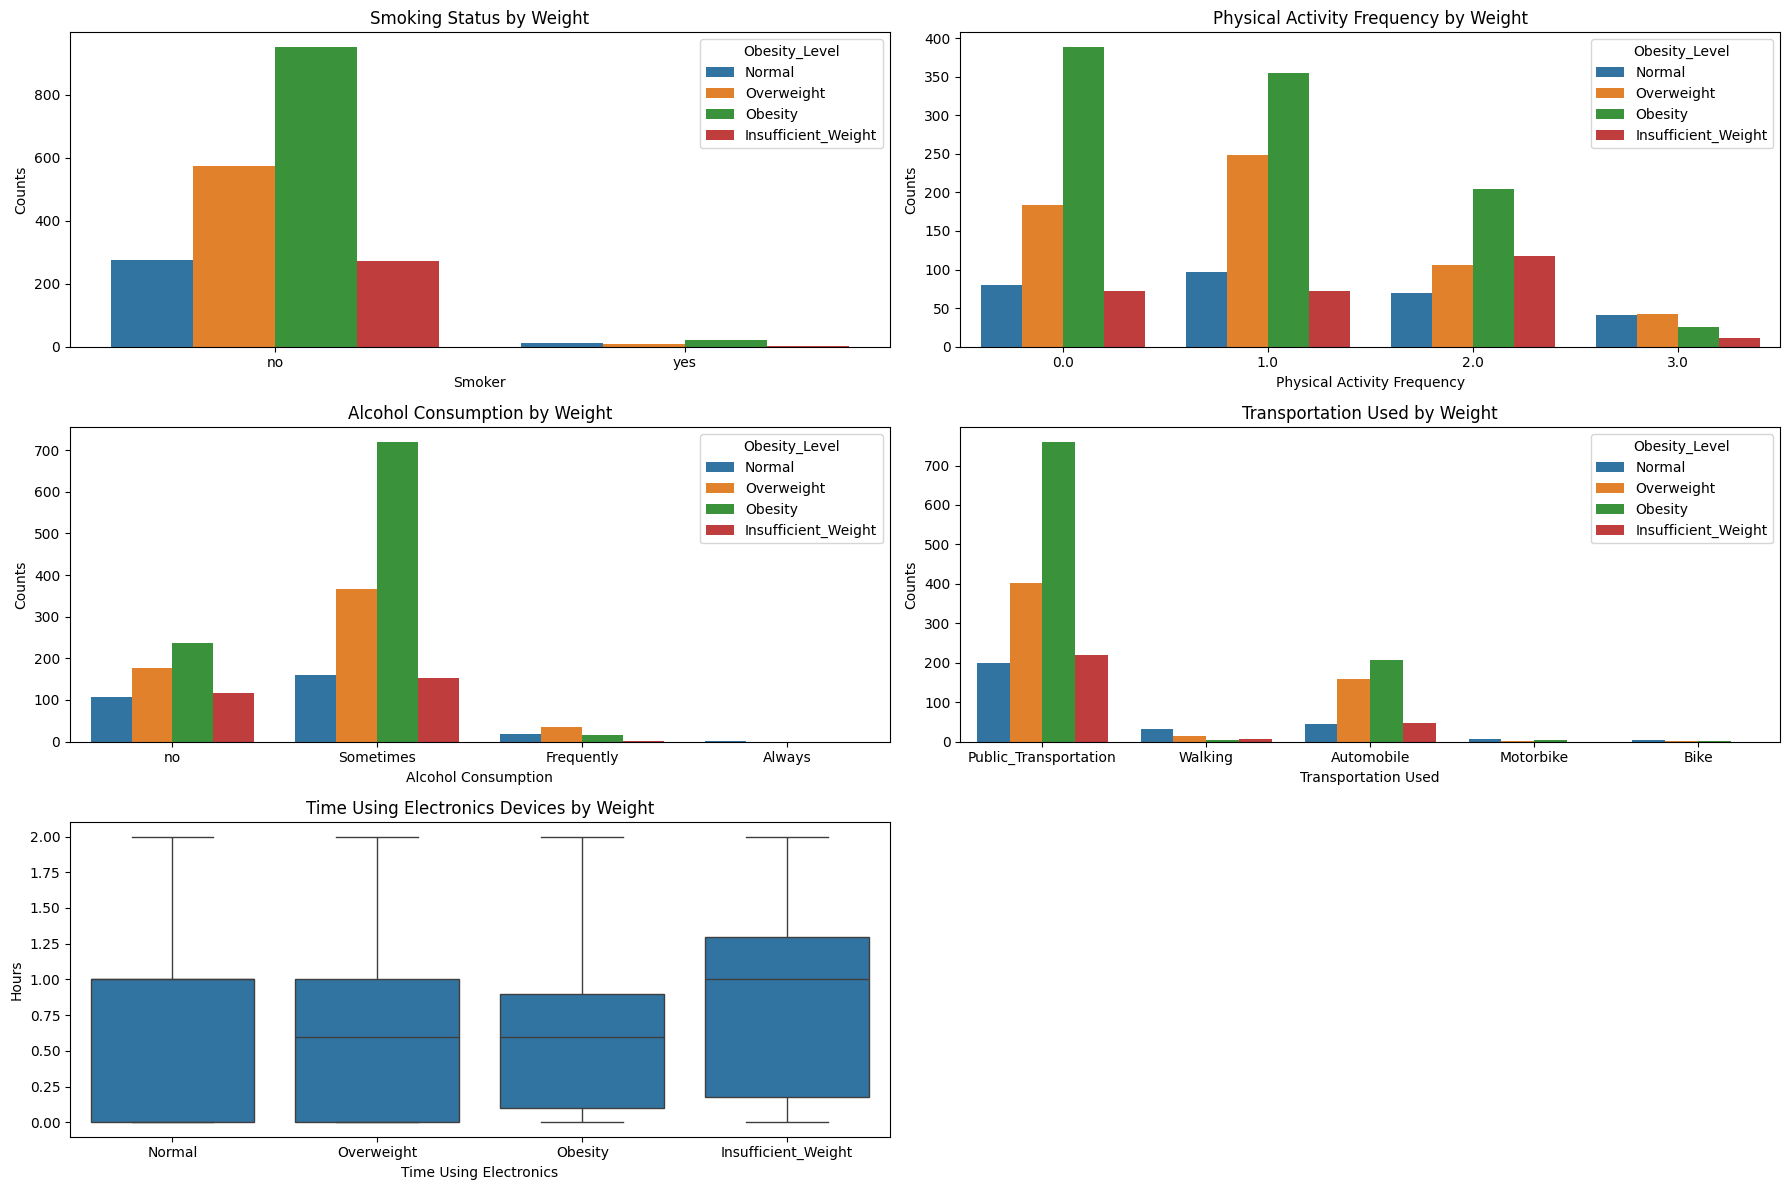

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(18, 12))

sns.countplot(data=df, x='Smoker', hue='Obesity_Level', ax=ax[0][0])
ax[0][0].set_title('Smoking Status by Weight')
ax[0][0].set_xlabel('Smoker')
ax[0][0].set_ylabel('Counts')

sns.countplot(data=df, x='Physical_Activity_Frequency', hue='Obesity_Level', ax=ax[0][1])
ax[0][1].set_title('Physical Activity Frequency by Weight')
ax[0][1].set_xlabel('Physical Activity Frequency')
ax[0][1].set_ylabel('Counts')

sns.countplot(data=df, x='Frequent_Consume_Alcohol', hue='Obesity_Level', ax=ax[1][0])
ax[1][0].set_title('Alcohol Consumption by Weight')
ax[1][0].set_xlabel('Alcohol Consumption')
ax[1][0].set_ylabel('Counts')

sns.countplot(data=df, x='Transportation_Used', hue='Obesity_Level', ax=ax[1][1])
ax[1][1].set_title('Transportation Used by Weight')
ax[1][1].set_xlabel('Transportation Used')
ax[1][1].set_ylabel('Counts')

sns.boxplot(data=df, y='Time_Using_Electronics_Devices', x='Obesity_Level', ax=ax[2][0])
ax[2][0].set_title('Time Using Electronics Devices by Weight')
ax[2][0].set_xlabel('Time Using Electronics')
ax[2][0].set_ylabel('Hours')

ax[2][1].axis('off')
plt.tight_layout()
plt.show()

In [30]:
Smoker_contingency_table, Smoker_chi2, Smoker_p_value, Smoker_dof, Smoker_expected = chi2_test_relationship(df, 'Smoker', 'Obesity_Level')

Chi2 square test on relationship between Smoker and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level  Insufficient_Weight  Normal  Obesity  Overweight
Smoker                                                         
no                             271     274      950         572
yes                              1      13       22           8


Chi-square Statistic: 13.9015
P-value: 0.0030
Degrees of Freedom: 3
Expected Frequencies: 
[[266.33064898 281.01800095 951.74040739 567.91094268]
 [  5.66935102   5.98199905  20.25959261  12.08905732]]

H0: There is no relationship between Smoker and Obesity_Level
H1: There is a relationship between Smoker and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Smoker and Obesity_Level. Hence, we reject H0.


In [31]:
Smoker_significant_residuals = calculate_adjusted_residuals( Smoker_contingency_table,  Smoker_expected, ' Smoker', 'Obesity_Level')

                       Observed  Adjusted Residuals
 Smoker Obesity_Level                              
yes     Normal               13            2.869394


Among smokers, the count in the normal weight category (n=13) is significantly higher than expected (adjusted residual = +2.87, p < 0.01), suggesting smokers are overrepresented in that group

In [32]:
Physical_Activity_Frequency_contingency_table, Physical_Activity_Frequency_chi2, Physical_Activity_Frequency_p_value, Physical_Activity_Frequency_dof, Physical_Activity_Frequency_expected = chi2_test_relationship(df, 'Physical_Activity_Frequency', 'Obesity_Level')

Chi2 square test on relationship between Physical_Activity_Frequency and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level                Insufficient_Weight  Normal  Obesity  Overweight
Physical_Activity_Frequency                                                  
0.0                                           72      80      388         184
1.0                                           72      97      355         248
2.0                                          117      69      204         106
3.0                                           11      41       25          42


Chi-square Statistic: 144.2699
P-value: 0.0000
Degrees of Freedom: 9
Expected Frequencies: 
[[ 93.28659403  98.43107532 333.36238749 198.91994315]
 [ 99.4713406  104.95689247 355.46376125 212.10800568]
 [ 63.90904784  67.43344387 228.38086215 136.27664614]
 [ 15.33301753  16.17858835  54.7929891   32.69540502]]

H0: There is no relationship betwe

In [33]:
Physical_Activity_Frequency_significant_residuals = calculate_adjusted_residuals( Physical_Activity_Frequency_contingency_table,  Physical_Activity_Frequency_expected, ' Physical_Activity_Frequency', 'Obesity_Level')

                                                  Observed  Adjusted Residuals
 Physical_Activity_Frequency Obesity_Level                                    
0.0                          Insufficient_Weight        72           -2.203924
                             Obesity                   388            2.992495
1.0                          Insufficient_Weight        72           -2.754424
                             Overweight                248            2.464445
2.0                          Insufficient_Weight       117            6.641090
                             Overweight                106           -2.593564
3.0                          Normal                     41            6.171009
                             Obesity                    25           -4.024867


The result shows the Insufficient_Weight individuals are significantly underrepresented among those exercising 0–1 times/week, but found more in the 2 times/week groups which can be explained that they just started this journey. Obese individuals are stated to not be physical active at all with the most individuals in this group, along with a minority of this weight group at 3 times/week. Moreover, Overweight individuals are more active at 1 time/week, but less so at 2 times/week. Lastly, Normal-weight individuals are much more likely to exercise 3 times/week.

In [34]:
Frequent_Consume_Alcohol_contingency_table, Frequent_Consume_Alcohol_chi2, Frequent_Consume_Alcohol_p_value, Frequent_Consume_Alcohol_dof, Frequent_Consume_Alcohol_expected = chi2_test_relationship(df, 'Frequent_Consume_Alcohol', 'Obesity_Level')

Chi2 square test on relationship between Frequent_Consume_Alcohol and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level             Insufficient_Weight  Normal  Obesity  Overweight
Frequent_Consume_Alcohol                                                  
Always                                      0       1        0           0
Frequently                                  1      18       16          35
Sometimes                                 154     161      719         367
no                                        117     107      237         178


Chi-square Statistic: 90.3289
P-value: 0.0000
Degrees of Freedom: 9
Expected Frequencies: 
[[1.28848887e-01 1.35954524e-01 4.60445287e-01 2.74751303e-01]
 [9.01942207e+00 9.51681667e+00 3.22311701e+01 1.92325912e+01]
 [1.80517290e+02 1.90472288e+02 6.45083847e+02 3.84926575e+02]
 [8.23344387e+01 8.68749408e+01 2.94224538e+02 1.75566082e+02]]

H0: There is no relation

In [35]:
Frequent_Consume_Alcohol_significant_residuals = calculate_adjusted_residuals( Frequent_Consume_Alcohol_contingency_table,  Frequent_Consume_Alcohol_expected, ' Frequent_Consume_Alcohol', 'Obesity_Level')

                                               Observed  Adjusted Residuals
 Frequent_Consume_Alcohol Obesity_Level                                    
Always                    Normal                      1            2.343364
Frequently                Insufficient_Weight         1           -2.670261
                          Normal                     18            2.749875
                          Obesity                    16           -2.858984
                          Overweight                 35            3.595352
Sometimes                 Normal                    161           -2.135492
                          Obesity                   719            2.910257
no                        Insufficient_Weight       117            3.820388
                          Normal                    107            2.159185
                          Obesity                   237           -3.336129


Adjusted residuals reveal that non-drinking is strongly linked with Insufficient Weight, while frequent drinking is strongly linked with being Overweight. Occasionally drinking is more associated with Obesity, whereas always drinking is slightly more common among Normal-weight individuals. These associations are statistically significant since residuals exceed |2| (p < 0.05) and some exceed |3| (p < 0.01)

In [36]:
Transportation_Used_contingency_table, Transportation_Used_chi2, Transportation_Used_p_value, Transportation_Used_dof, Transportation_Used_expected = chi2_test_relationship(df, 'Transportation_Used', 'Obesity_Level')

Chi2 square test on relationship between Transportation_Used and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level          Insufficient_Weight  Normal  Obesity  Overweight
Transportation_Used                                                    
Automobile                              46      45      206         160
Bike                                     0       4        1           2
Motorbike                                0       6        3           2
Public_Transportation                  220     200      759         401
Walking                                  6      32        3          15


Chi-square Statistic: 150.1505
P-value: 0.0000
Degrees of Freedom: 12
Expected Frequencies: 
[[ 58.88394126  62.13121743 210.42349597 125.56134533]
 [  0.90194221   0.95168167   3.22311701   1.92325912]
 [  1.41733775   1.49549976   5.06489815   3.02226433]
 [203.58124112 214.8081478  727.50355282 434.10705827]
 [  7.2

In [37]:
Transportation_Used_significant_residuals = calculate_adjusted_residuals( Transportation_Used_contingency_table,  Transportation_Used_expected, 'Transportation_Used', 'Obesity_Level')

                                   Observed  Adjusted Residuals
Transportation_Used Obesity_Level                              
Automobile          Normal               45           -2.173368
                    Overweight          160            3.073394
Bike                Normal                4            3.124744
Motorbike           Normal                6            3.683439
Walking             Normal               32            8.838111
                    Obesity               3           -4.487090


The adjusted residual analysis shows significant associations: overweight individuals are overrepresented among automobile users (residual = +3.09), while normal-weight individuals are strongly overrepresented among bike users (+3.00), motorbike users (+3.53), and walkers (+8.48). Conversely, obese individuals are strongly underrepresented among walkers (–4.49), indicating they walk far less than expected

In [38]:
electronic_f_value, electronic_p_value = anova_test_relationship(df, 'Time_Using_Electronics_Devices', 'Obesity_Level')

One-way ANOVA test on relationship between Time_Using_Electronics_Devices and Obesity_Level
---------------------------------------------------------------------------
F-statistic: 11.032677426081607
p-value: 3.466506288977259e-07

H0: There is no relationship between Time_Using_Electronics_Devices and Obesity_Level
H1: There is a relationship between Time_Using_Electronics_Devices and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Time_Using_Electronics_Devices and Obesity_Level. Hence, we reject H0.


In [39]:
electronic_tukey_results = tukey_hsd_test(df, "Time_Using_Electronics_Devices", "Obesity_Level")

Tukey's HSD test on Time_Using_Electronics_Devices by Obesity_Level
---------------------------------------------------------------------------
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
       group1         group2   meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
Insufficient_Weight     Normal  -0.1652  0.007 -0.2969 -0.0335   True
Insufficient_Weight    Obesity  -0.2378    0.0 -0.3445  -0.131   True
Insufficient_Weight Overweight   -0.186 0.0002 -0.3004 -0.0717   True
             Normal    Obesity  -0.0726 0.2809 -0.1771   0.032  False
             Normal Overweight  -0.0208 0.9644 -0.1331  0.0915  False
            Obesity Overweight   0.0518 0.3615 -0.0299  0.1334  False
---------------------------------------------------------------------


Individuals with Insufficient_Weight use electronic devices significantly less than those in the Normal, Obesity, and Overweight categories, with mean differences of −0.1534, −0.2434, and −0.2013, respectively (all p-values < 0.05). However, no significant differences were found between the Normal, Obesity, and Overweight groups, as all pairwise comparisons among these groups yielded p-values greater than 0.05

# Demographic Factors



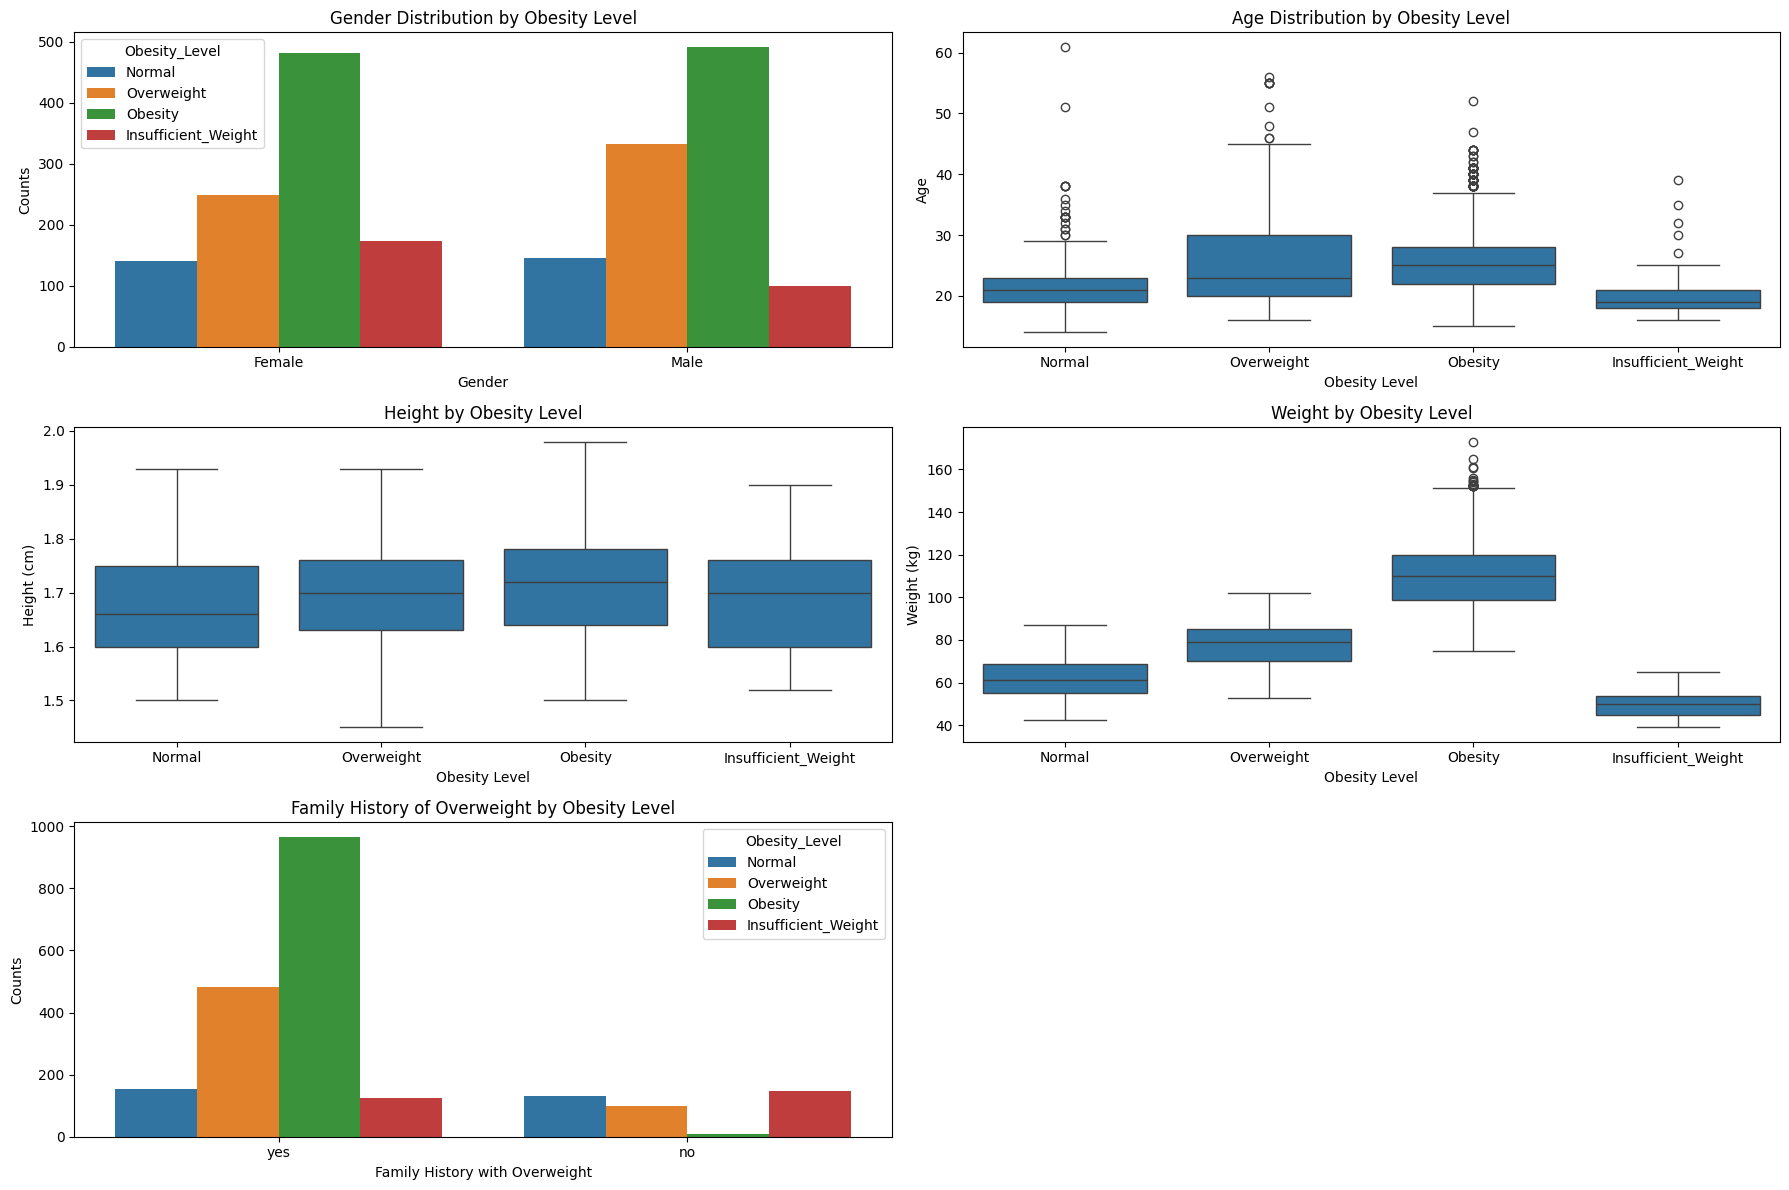

In [40]:
fig, ax = plt.subplots(3, 2, figsize=(18, 12))

sns.countplot(data=df, x='Gender', hue='Obesity_Level', ax=ax[0][0])
ax[0][0].set_title('Gender Distribution by Obesity Level')
ax[0][0].set_xlabel('Gender')
ax[0][0].set_ylabel('Counts')

sns.boxplot(data=df, x='Obesity_Level', y='Age', ax=ax[0][1])
ax[0][1].set_title('Age Distribution by Obesity Level')
ax[0][1].set_xlabel('Obesity Level')
ax[0][1].set_ylabel('Age')

sns.boxplot(data=df, x='Obesity_Level', y='Height', ax=ax[1][0])
ax[1][0].set_title('Height by Obesity Level')
ax[1][0].set_xlabel('Obesity Level')
ax[1][0].set_ylabel('Height (cm)')

sns.boxplot(data=df, x='Obesity_Level', y='Weight', ax=ax[1][1])
ax[1][1].set_title('Weight by Obesity Level')
ax[1][1].set_xlabel('Obesity Level')
ax[1][1].set_ylabel('Weight (kg)')

sns.countplot(data=df, x='Family_History_With_Overweight', hue='Obesity_Level', ax=ax[2][0])
ax[2][0].set_title('Family History of Overweight by Obesity Level')
ax[2][0].set_xlabel('Family History with Overweight')
ax[2][0].set_ylabel('Counts')

ax[2][1].axis('off')
plt.tight_layout()
plt.show()

In [41]:
Gender_contingency_table, Gender_chi2, Gender_p_value, Gender_dof, Gender_expected = chi2_test_relationship(df, 'Gender', 'Obesity_Level')

Chi2 square test on relationship between Gender and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level  Insufficient_Weight  Normal  Obesity  Overweight
Gender                                                         
Female                         173     141      481         248
Male                            99     146      491         332


Chi-square Statistic: 32.1963
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies: 
[[134.38938892 141.80056845 480.24443392 286.56560872]
 [137.61061108 145.19943155 491.75556608 293.43439128]]

H0: There is no relationship between Gender and Obesity_Level
H1: There is a relationship between Gender and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Gender and Obesity_Level. Hence, we reject H0.


In [42]:
Gender_significant_residual = calculate_adjusted_residuals(Gender_contingency_table, Gender_expected, 'Gender', 'Obesity_Level')

                            Observed  Adjusted Residuals
Gender Obesity_Level                                    
Female Insufficient_Weight       173            3.330613
       Overweight                248           -2.278181
Male   Insufficient_Weight        99           -3.291400
       Overweight                332            2.251359


Females are more likely to be classified as "Insufficient Weight" than expected, while they are less likely to be classified as "Overweight." Whereas, Males are more likely to be classified as "Overweight" than expected and less likely to be classified as "Insufficient Weight. This indicates a significant difference in obesity levels between genders with female leaning towrds low obesity levels while male leaning towards high obesity levels.

In [43]:
age_f_value, age_p_value = anova_test_relationship(df, 'Age', 'Obesity_Level')

One-way ANOVA test on relationship between Age and Obesity_Level
---------------------------------------------------------------------------
F-statistic: 95.57321822234245
p-value: 5.388974184709845e-58

H0: There is no relationship between Age and Obesity_Level
H1: There is a relationship between Age and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Age and Obesity_Level. Hence, we reject H0.


In [44]:
age_tukey_results = tukey_hsd_test(df, 'Age', 'Obesity_Level')

Tukey's HSD test on Age by Obesity_Level
---------------------------------------------------------------------------
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
       group1         group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Insufficient_Weight     Normal   1.9776 0.0005  0.6791 3.2762   True
Insufficient_Weight    Obesity    6.063    0.0  5.0104 7.1157   True
Insufficient_Weight Overweight    5.439    0.0  4.3113 6.5667   True
             Normal    Obesity   4.0854    0.0  3.0545 5.1163   True
             Normal Overweight   3.4613    0.0  2.3539 4.5688   True
            Obesity Overweight  -0.6241 0.1909 -1.4292 0.1811  False
--------------------------------------------------------------------


The result showed that every comparision except 'Obesity vs Overweight' shows a significant age difference as their mean age difference are large enough and the confidence intervals do not include zero while 'Obesity vs Overweight' has a small difference and the confidence intervals includes zero which is rejected. From this data, we see the obesity tends to be found more in younger wwhich can be seen in the boxplot

In [45]:
height_f_value, height_p_value = anova_test_relationship(df, 'Height', 'Obesity_Level')

One-way ANOVA test on relationship between Height and Obesity_Level
---------------------------------------------------------------------------
F-statistic: 16.109213526525096
p-value: 2.3567377786602235e-10

H0: There is no relationship between Height and Obesity_Level
H1: There is a relationship between Height and Obesity_Level

Since the p-value is smaller than the alpha value (0.05), there is sufficient evidence to prove
that there is a relationship between Height and Obesity_Level. Hence, we reject H0.


In [46]:
height_tukey_results = tukey_hsd_test(df, 'Height', 'Obesity_Level')

Tukey's HSD test on Height by Obesity_Level
---------------------------------------------------------------------------
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
       group1         group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Insufficient_Weight     Normal  -0.0145 0.2492 -0.0346 0.0056  False
Insufficient_Weight    Obesity   0.0243 0.0007   0.008 0.0406   True
Insufficient_Weight Overweight   0.0049 0.8905 -0.0126 0.0223  False
             Normal    Obesity   0.0388    0.0  0.0228 0.0547   True
             Normal Overweight   0.0193 0.0196  0.0022 0.0365   True
            Obesity Overweight  -0.0194 0.0004 -0.0319 -0.007   True
--------------------------------------------------------------------


The group 'Insufficient Weight vs Normal' and 'Insufficient Weight vs Overweight' were only ones that do not have a siginificant difference. Whereas for other groups, it showed in the Insufficient Weight group were on average 2.4 cm taller than those with Obesity (p = 0.0007), Normal-weight individuals were 3.9 cm taller than those with Obesity (p < 0.001) and 1.9 cm taller than those Overweight (p = 0.0196) and Obesity individuals were 1.9 cm shorter than Overweight (p = 0.0004).

In [47]:
history_contingency_table, history_chi2, history_p_value, history_dof, history_expected = chi2_test_relationship(df, 'Family_History_With_Overweight', 'Obesity_Level')

Chi2 square test on relationship between Family_History_With_Overweight and Obesity_Level
---------------------------------------------------------------------------
Contingency table:
Obesity_Level                   Insufficient_Weight  Normal  Obesity  \
Family_History_With_Overweight                                         
no                                              146     132        8   
yes                                             126     155      964   

Obesity_Level                   Overweight  
Family_History_With_Overweight              
no                                      99  
yes                                    481  


Chi-square Statistic: 575.5712
P-value: 0.0000
Degrees of Freedom: 3
Expected Frequencies: 
[[ 49.60682141  52.34249171 177.27143534 105.77925154]
 [222.39317859 234.65750829 794.72856466 474.22074846]]

H0: There is no relationship between Family_History_With_Overweight and Obesity_Level
H1: There is a relationship between Family_History_Wit

In [48]:
history_significant_residual = calculate_adjusted_residuals(history_contingency_table, history_expected, 'Family_History_With_Overweight', 'Obesity_Level')

                                                    Observed  \
Family_History_With_Overweight Obesity_Level                   
no                             Insufficient_Weight       146   
                               Normal                    132   
                               Obesity                     8   
yes                            Insufficient_Weight       126   
                               Normal                    155   
                               Obesity                   964   

                                                    Adjusted Residuals  
Family_History_With_Overweight Obesity_Level                            
no                             Insufficient_Weight           13.685971  
                               Normal                        11.010309  
                               Obesity                      -12.713476  
yes                            Insufficient_Weight           -6.463765  
                               Normal            

Chi-square analysis reveals a significant link between family history of overweight and obesity status. Individuals with a positive family history are significantly more likely to be obese (adjusted residual ≈ +6), while those without such history are significantly less likely (adjusted residual ≈ –12.7). In contrast, Insufficient or Normal weight categories are overrepresented among individuals without family history

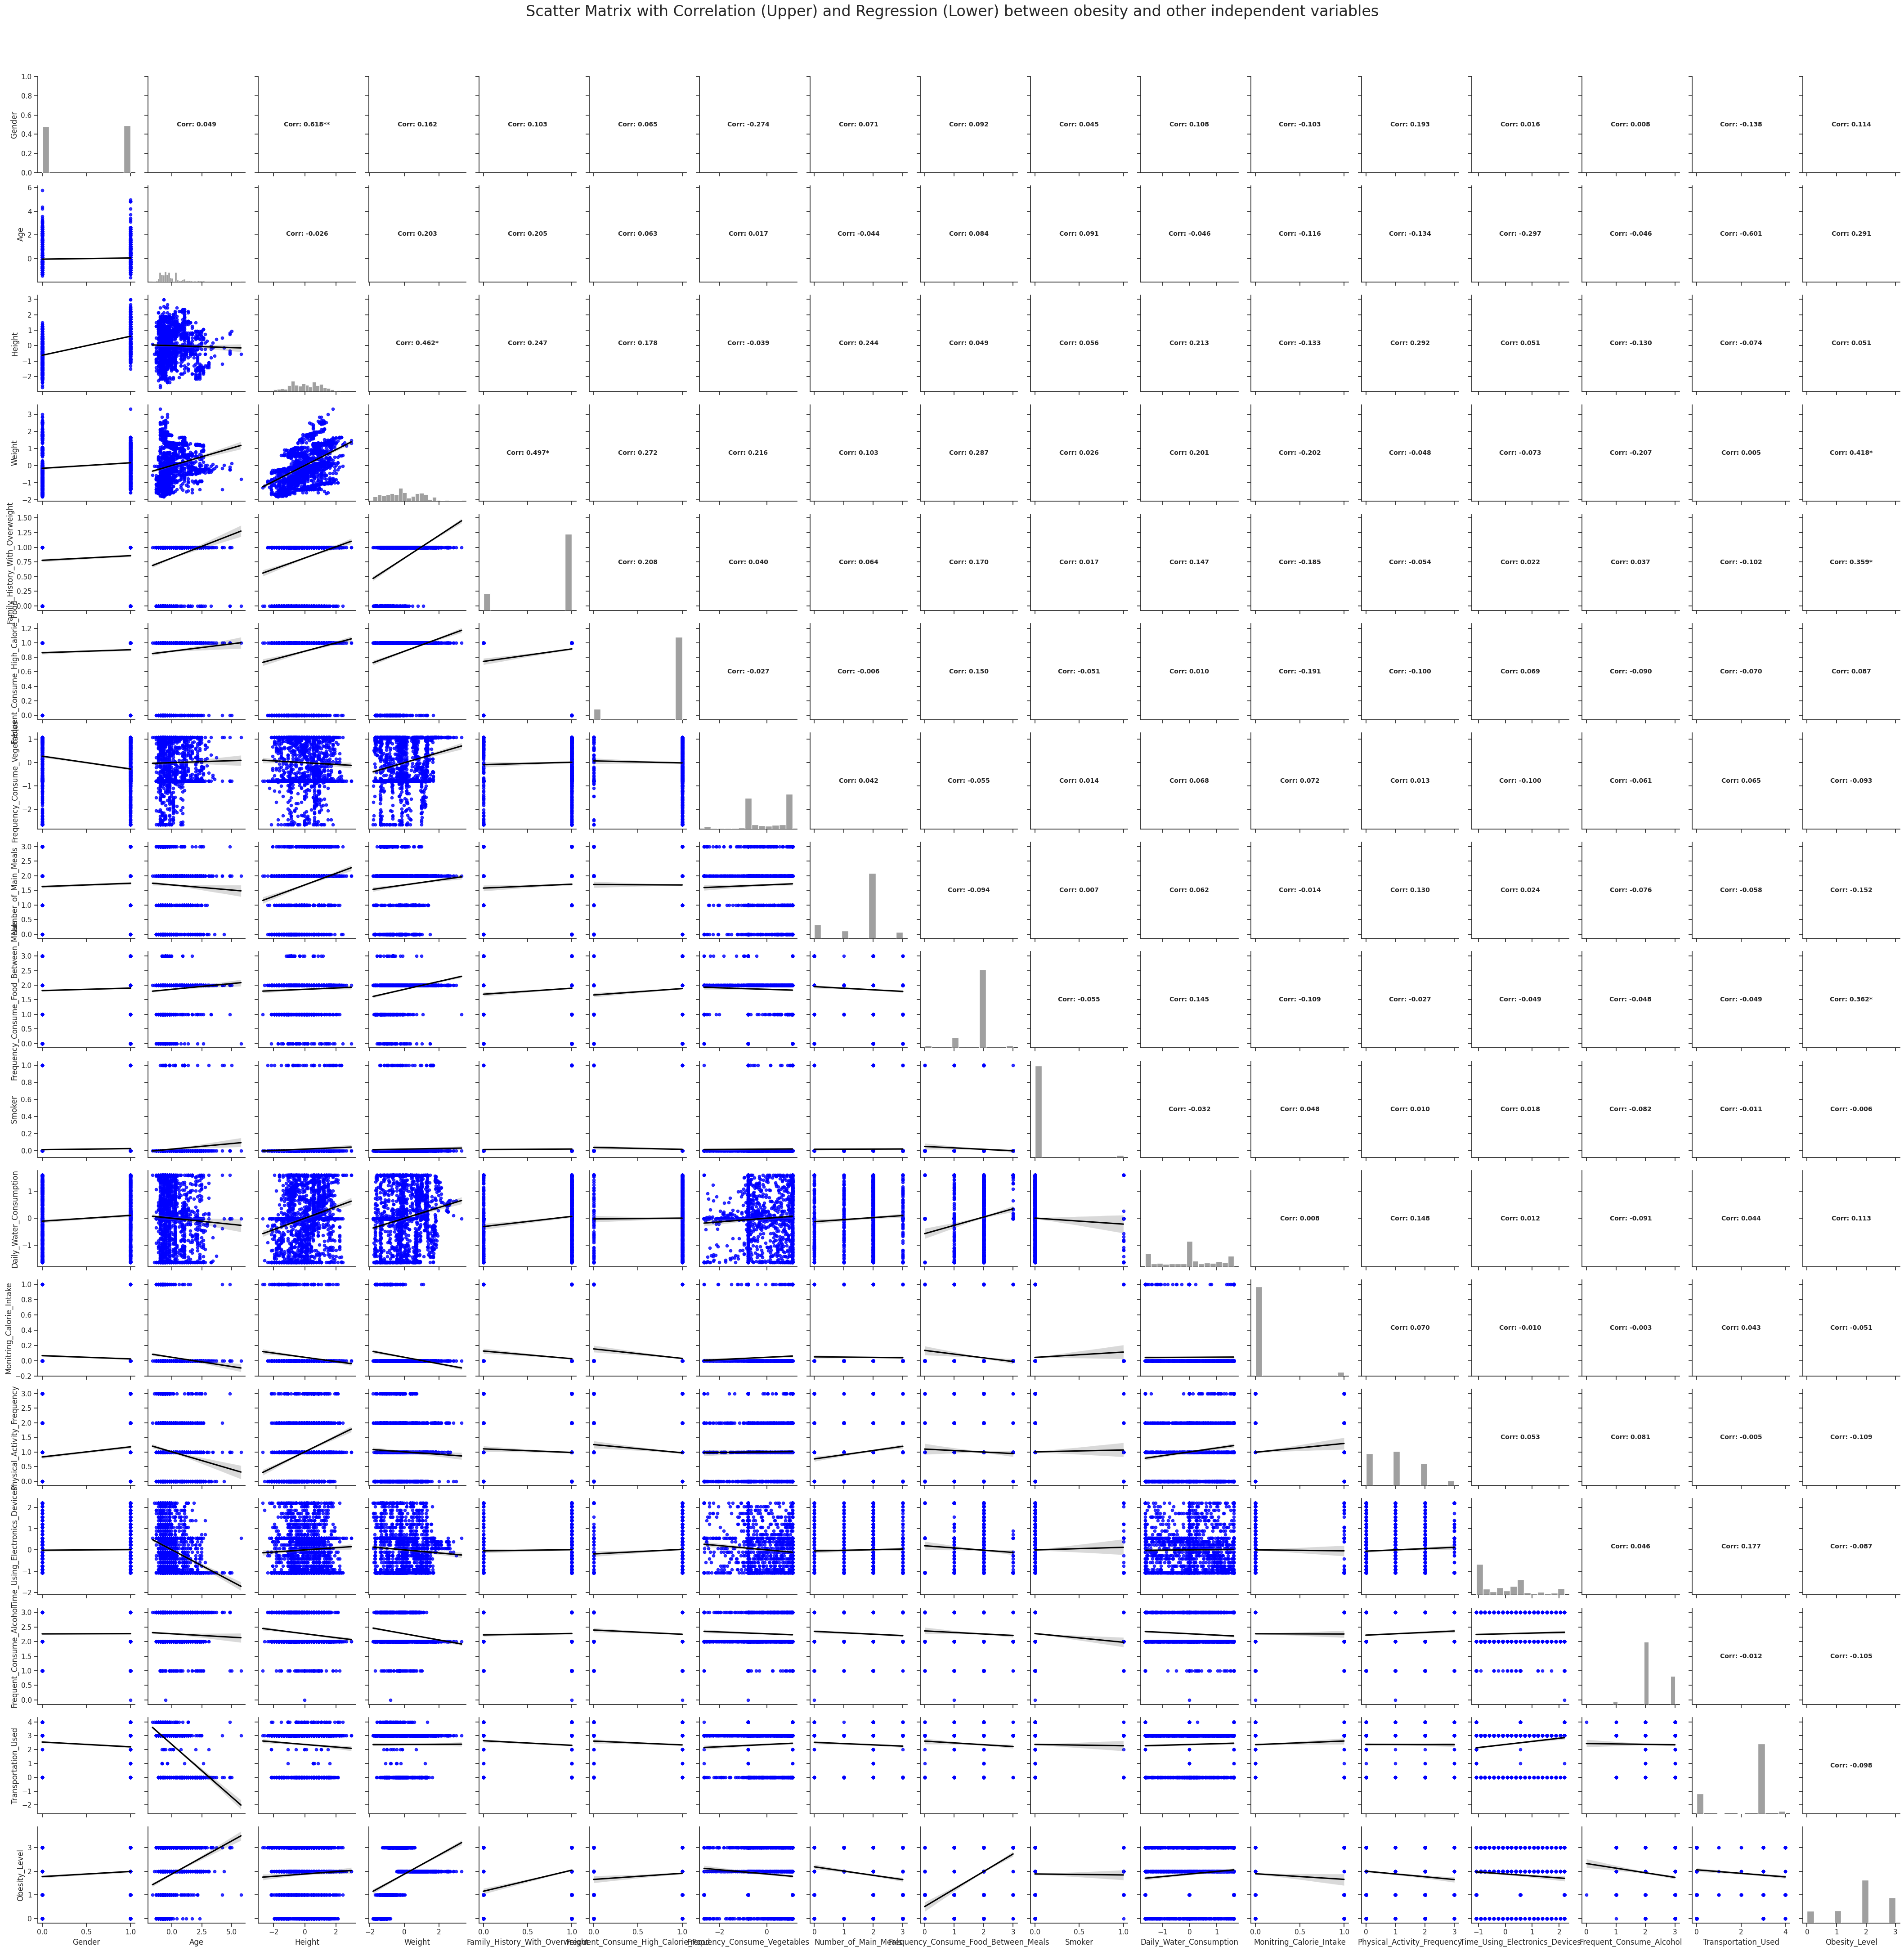

In [49]:
# Custom correlation function (shown in upper triangle)
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    stars = ""
    if r >= 0.8:
        stars = "***"
    elif r >= 0.5:
        stars = "**"
    elif r >= 0.3:
        stars = "*"
    ax.annotate(f"Corr: {r:.3f}{stars}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=10, fontweight='bold')


df_copy.corr(method='pearson')

# PairGrid
sns.set(style="ticks")
g = sns.PairGrid(df_copy.iloc[:,:])
g.map_lower(sns.regplot, scatter_kws={"color": "blue", "s": 20}, line_kws={"color": "black"})
g.map_diag(sns.histplot, kde=False, color="gray")
g.map_upper(corrfunc)

plt.suptitle("Scatter Matrix with Correlation (Upper) and Regression (Lower) between obesity and other independent variables", y=1.02, fontsize=24)
plt.tight_layout()
plt.show()

Correlation with Obesity

Weight: 0.418

Frequently consume food between Meal: 0.362

Family History with Overweight: 0.359

Age: 0.291

Gender: 0.114

The correlations with obesity reveal several key factors influencing the likelihood of being classified as obese. The strongest correlation is with weight (0.418), indicating that higher weight significantly increases obesity risk. Additionally, frequent snacking between meals shows a moderate correlation (0.362), suggesting that individuals who often eat outside regular meal times are more prone to obesity due to increased caloric intake and poor dietary choices. Family history also plays a role, with a correlation of 0.359, highlighting the influence of genetic predisposition and shared environmental factors on weight. Age (0.291) is another important factor, as older individuals may experience metabolic changes and lifestyle shifts that contribute to weight gain. Lastly, gender has the weakest correlation (0.114), indicating that while differences in obesity rates exist between genders, they are less significant compared to the other factors. Overall, these insights suggest that effective obesity prevention strategies should prioritize weight management, address eating habits, and consider familial and age-related risks, while recognizing that gender may play a lesser role in this context


Gender and Height: 0.618

Weight and Family history with overweight: 0.497

Height and Weight: 0.462

However, there are some noteworthy result between the independent variables where gender and height has a correlation of 0.618 which is the higest. Moreover, the weight variable has the high correlation with Family history with overweight and height. These variables highlight the interplay among each other and suggest that height may influence how weight is perceived and managed differently across genders. This relationship implies that taller individuals might have distinct weight norms compared to shorter individuals, which could vary further by gender, potentially affecting health outcomes and obesity-related behaviors.

# Neural Network Model prediction on obesity based on the features

In [58]:
# Train and test split preparation
X = df_copy.drop(['Obesity_Level'], axis=1)

y = df_copy['Obesity_Level'].values

y = y.reshape(-1,1)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

print(X.shape, y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2111, 16) (2111, 4)
(1688, 16) (423, 16) (1688, 4) (423, 4)


In [59]:
# model building
model = Sequential([
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l1(0.01), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
]
)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
# Create Early stop to save time on training best model and checkpoint to save best model
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="min",
    restore_best_weights=True
)

checkpoint = ModelCheckpoint('best_nn_model.h5', monitor='val_loss', save_best_only=True)


In [61]:
# Train the neural network model
history = model.fit(X_train,y_train,epochs=100, batch_size=16,validation_split=0.2, callbacks=[early_stop, checkpoint])

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4447 - loss: 2.9807

85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4448 - loss: 2.9789 - val_accuracy: 0.5473 - val_loss: 2.4245
Epoch 2/100
81/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4868 - loss: 2.3843

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4891 - loss: 2.3773 - val_accuracy: 0.6420 - val_loss: 1.9077
Epoch 3/100
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5748 - loss: 1.9098

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5760 - loss: 1.9035 - val_accuracy: 0.7574 - val_loss: 1.5111
Epoch 4/100
73/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6669 - loss: 1.5430

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6674 - loss: 1.5354 - val_accuracy: 0.7899 - val_loss: 1.2481
Epoch 5/100
68/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 1.3070

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7074 - loss: 1.3049 - val_accuracy: 0.8047 - val_loss: 1.0795
Epoch 6/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 1.1949

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7218 - loss: 1.1939 - val_accuracy: 0.8314 - val_loss: 0.9590
Epoch 7/100
79/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 1.0279

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7774 - loss: 1.0274 - val_accuracy: 0.9172 - val_loss: 0.8698
Epoch 8/100
78/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7772 - loss: 0.9746

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7770 - loss: 0.9735 - val_accuracy: 0.9083 - val_loss: 0.8045
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.9126

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7879 - loss: 0.9124 - val_accuracy: 0.9290 - val_loss: 0.7507
Epoch 10/100
69/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8067 - loss: 0.8702

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8087 - loss: 0.8653 - val_accuracy: 0.9467 - val_loss: 0.6998
Epoch 11/100
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8311 - loss: 0.8102

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8313 - loss: 0.8098 - val_accuracy: 0.9379 - val_loss: 0.6655
Epoch 12/100
81/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.7859

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8160 - loss: 0.7850 - val_accuracy: 0.9320 - val_loss: 0.6398
Epoch 13/100
72/85 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8337 - loss: 0.7626 

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8342 - loss: 0.7619 - val_accuracy: 0.9497 - val_loss: 0.6156
Epoch 14/100
67/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.7191

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.7216 - val_accuracy: 0.9467 - val_loss: 0.5931
Epoch 15/100
79/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.7236

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8311 - loss: 0.7235 - val_accuracy: 0.9290 - val_loss: 0.5816
Epoch 16/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8590 - loss: 0.7029

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.7016 - val_accuracy: 0.9438 - val_loss: 0.5603
Epoch 17/100
66/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8442 - loss: 0.6873

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8468 - loss: 0.6841 - val_accuracy: 0.9467 - val_loss: 0.5403
Epoch 18/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8544 - loss: 0.6670

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8560 - loss: 0.6661 - val_accuracy: 0.9497 - val_loss: 0.5322
Epoch 19/100
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.6693

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.6688 - val_accuracy: 0.9497 - val_loss: 0.5198
Epoch 20/100
78/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.6390

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8791 - loss: 0.6392 - val_accuracy: 0.9408 - val_loss: 0.5117
Epoch 21/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8605 - loss: 0.6441

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8604 - loss: 0.6440 - val_accuracy: 0.9379 - val_loss: 0.5084
Epoch 22/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.6091

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8918 - loss: 0.6107 - val_accuracy: 0.9497 - val_loss: 0.4967
Epoch 23/100
67/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8886 - loss: 0.6002

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8867 - loss: 0.6024 - val_accuracy: 0.9527 - val_loss: 0.4889
Epoch 24/100
63/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8654 - loss: 0.6133

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8688 - loss: 0.6111 - val_accuracy: 0.9527 - val_loss: 0.4825
Epoch 25/100
70/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8731 - loss: 0.6084

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8735 - loss: 0.6093 - val_accuracy: 0.9497 - val_loss: 0.4801
Epoch 26/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8848 - loss: 0.5919

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8847 - loss: 0.5921 - val_accuracy: 0.9556 - val_loss: 0.4732
Epoch 27/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8656 - loss: 0.6263

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8658 - loss: 0.6260 - val_accuracy: 0.9497 - val_loss: 0.4718
Epoch 28/100
81/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8863 - loss: 0.6039

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8865 - loss: 0.6028 - val_accuracy: 0.9527 - val_loss: 0.4612
Epoch 29/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8876 - loss: 0.5881 - val_accuracy: 0.9556 - val_loss: 0.4705
Epoch 30/100
72/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8896 - loss: 0.5741

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8902 - loss: 0.5740 - val_accuracy: 0.9556 - val_loss: 0.4598
Epoch 31/100
66/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.5675

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8979 - loss: 0.5661 - val_accuracy: 0.9527 - val_loss: 0.4453
Epoch 32/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8939 - loss: 0.5518 - val_accuracy: 0.9615 - val_loss: 0.4471
Epoch 33/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8723 - loss: 0.5723 - val_accuracy: 0.9586 - val_loss: 0.4472
Epoch 34/100
76/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8854 - loss: 0.5606

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8857 - loss: 0.5609 - val_accuracy: 0.9615 - val_loss: 0.4400
Epoch 35/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.5444

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9030 - loss: 0.5459 - val_accuracy: 0.9675 - val_loss: 0.4387
Epoch 36/100
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8975 - loss: 0.5627

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8977 - loss: 0.5624 - val_accuracy: 0.9586 - val_loss: 0.4352
Epoch 37/100
73/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9091 - loss: 0.5402

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9089 - loss: 0.5398 - val_accuracy: 0.9645 - val_loss: 0.4317
Epoch 38/100
76/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8963 - loss: 0.5369

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8969 - loss: 0.5369 - val_accuracy: 0.9527 - val_loss: 0.4292
Epoch 39/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8944 - loss: 0.5538 - val_accuracy: 0.9556 - val_loss: 0.4300
Epoch 40/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8959 - loss: 0.5360

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8960 - loss: 0.5360 - val_accuracy: 0.9615 - val_loss: 0.4253
Epoch 41/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8898 - loss: 0.5624 - val_accuracy: 0.9615 - val_loss: 0.4276
Epoch 42/100
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8910 - loss: 0.5550

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8914 - loss: 0.5540 - val_accuracy: 0.9586 - val_loss: 0.4202
Epoch 43/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9078 - loss: 0.5286

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9074 - loss: 0.5291 - val_accuracy: 0.9675 - val_loss: 0.4175
Epoch 44/100
79/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.5276

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8967 - loss: 0.5276 - val_accuracy: 0.9615 - val_loss: 0.4129
Epoch 45/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9037 - loss: 0.5228

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9037 - loss: 0.5227 - val_accuracy: 0.9645 - val_loss: 0.4129
Epoch 46/100
76/85 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8940 - loss: 0.5262

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8957 - loss: 0.5244 - val_accuracy: 0.9615 - val_loss: 0.4091
Epoch 47/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9179 - loss: 0.5024 - val_accuracy: 0.9615 - val_loss: 0.4106
Epoch 48/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9209 - loss: 0.5211 - val_accuracy: 0.9556 - val_loss: 0.4105
Epoch 49/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9101 - loss: 0.5052

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9101 - loss: 0.5053 - val_accuracy: 0.9645 - val_loss: 0.4016
Epoch 50/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.4926 - val_accuracy: 0.9645 - val_loss: 0.4032
Epoch 51/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9213 - loss: 0.4964 - val_accuracy: 0.9615 - val_loss: 0.4030
Epoch 52/100
74/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9056 - loss: 0.5236

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9065 - loss: 0.5225 - val_accuracy: 0.9615 - val_loss: 0.3974
Epoch 53/100
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9144 - loss: 0.4917

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9142 - loss: 0.4920 - val_accuracy: 0.9645 - val_loss: 0.3959
Epoch 54/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9099 - loss: 0.4982 - val_accuracy: 0.9615 - val_loss: 0.3969
Epoch 55/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.4877

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.4877 - val_accuracy: 0.9822 - val_loss: 0.3906
Epoch 56/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9025 - loss: 0.5020 - val_accuracy: 0.9586 - val_loss: 0.3953
Epoch 57/100
69/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9096 - loss: 0.4898

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9078 - loss: 0.4926 - val_accuracy: 0.9675 - val_loss: 0.3874
Epoch 58/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9147 - loss: 0.4921 - val_accuracy: 0.9645 - val_loss: 0.3896
Epoch 59/100
67/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.4892

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9155 - loss: 0.4883 - val_accuracy: 0.9615 - val_loss: 0.3836
Epoch 60/100
82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.4763

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9225 - loss: 0.4764 - val_accuracy: 0.9734 - val_loss: 0.3833
Epoch 61/100
78/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9164 - loss: 0.4892

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9166 - loss: 0.4890 - val_accuracy: 0.9645 - val_loss: 0.3789
Epoch 62/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9080 - loss: 0.4822 - val_accuracy: 0.9645 - val_loss: 0.3806
Epoch 63/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9093 - loss: 0.4848 - val_accuracy: 0.9615 - val_loss: 0.3790
Epoch 64/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9238 - loss: 0.4740 - val_accuracy: 0.9615 - val_loss: 0.3805
Epoch 65/100
81/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9075 - loss: 0.4825

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9081 - loss: 0.4822 - val_accuracy: 0.9615 - val_loss: 0.3788
Epoch 66/100
68/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.4567

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9268 - loss: 0.4614 - val_accuracy: 0.9675 - val_loss: 0.3769
Epoch 67/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.4803

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9082 - loss: 0.4804 - val_accuracy: 0.9615 - val_loss: 0.3746
Epoch 68/100
79/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.4765

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9208 - loss: 0.4764 - val_accuracy: 0.9675 - val_loss: 0.3708
Epoch 69/100
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9276 - loss: 0.4621

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9272 - loss: 0.4628 - val_accuracy: 0.9645 - val_loss: 0.3694
Epoch 70/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.4435 - val_accuracy: 0.9556 - val_loss: 0.3729
Epoch 71/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9078 - loss: 0.4799 - val_accuracy: 0.9615 - val_loss: 0.3716
Epoch 72/100
83/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9296 - loss: 0.4533

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9292 - loss: 0.4541 - val_accuracy: 0.9645 - val_loss: 0.3674
Epoch 73/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9044 - loss: 0.4891 - val_accuracy: 0.9615 - val_loss: 0.3686
Epoch 74/100
78/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9078 - loss: 0.4796

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9081 - loss: 0.4785 - val_accuracy: 0.9645 - val_loss: 0.3674
Epoch 75/100
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9241 - loss: 0.4613

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9241 - loss: 0.4613 - val_accuracy: 0.9675 - val_loss: 0.3596
Epoch 76/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9388 - loss: 0.4330 - val_accuracy: 0.9527 - val_loss: 0.3683
Epoch 77/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9119 - loss: 0.4668 - val_accuracy: 0.9675 - val_loss: 0.3625
Epoch 78/100
79/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9293 - loss: 0.4515

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9290 - loss: 0.4516 - val_accuracy: 0.9763 - val_loss: 0.3587
Epoch 79/100
75/85 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9292 - loss: 0.4563

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9285 - loss: 0.4563 - val_accuracy: 0.9675 - val_loss: 0.3570
Epoch 80/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9314 - loss: 0.4460 - val_accuracy: 0.9675 - val_loss: 0.3585
Epoch 81/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.4707 - val_accuracy: 0.9645 - val_loss: 0.3572
Epoch 82/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9387 - loss: 0.4393 - val_accuracy: 0.9556 - val_loss: 0.3637
Epoch 83/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.4782 - val_accuracy: 0.9556 - val_loss: 0.3583
Epoch 84/100
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9243 - loss: 0.4460

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9246 - loss: 0.4458 - val_accuracy: 0.9675 - val_loss: 0.3455
Epoch 85/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9285 - loss: 0.4319 - val_accuracy: 0.9615 - val_loss: 0.3533
Epoch 86/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9132 - loss: 0.4659 - val_accuracy: 0.9675 - val_loss: 0.3524
Epoch 87/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9165 - loss: 0.4543 - val_accuracy: 0.9734 - val_loss: 0.3512
Epoch 88/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9058 - loss: 0.4629 - val_accuracy: 0.9675 - val_loss: 0.3469
Epoch 89/100
77/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9337 - loss: 0.4286

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9329 - loss: 0.4293 - val_accuracy: 0.9793 - val_loss: 0.3412
Epoch 90/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9324 - loss: 0.4361 - val_accuracy: 0.9675 - val_loss: 0.3560
Epoch 91/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.4399

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9329 - loss: 0.4398 - val_accuracy: 0.9675 - val_loss: 0.3382
Epoch 92/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9233 - loss: 0.4364 - val_accuracy: 0.9645 - val_loss: 0.3454
Epoch 93/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.4274 - val_accuracy: 0.9734 - val_loss: 0.3434
Epoch 94/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9302 - loss: 0.4281 - val_accuracy: 0.9704 - val_loss: 0.3480
Epoch 95/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9335 - loss: 0.4529 - val_accuracy: 0.9556 - val_loss: 0.3486
Epoch 96/100
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9279 - loss: 0.4510

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9283 - loss: 0.4496 - val_accuracy: 0.9675 - val_loss: 0.3370
Epoch 97/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9296 - loss: 0.4365 - val_accuracy: 0.9704 - val_loss: 0.3393
Epoch 98/100
77/85 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9432 - loss: 0.4110 

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9423 - loss: 0.4126 - val_accuracy: 0.9704 - val_loss: 0.3351
Epoch 99/100
78/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.4283

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9297 - loss: 0.4275 - val_accuracy: 0.9675 - val_loss: 0.3331
Epoch 100/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9323 - loss: 0.4241 - val_accuracy: 0.9734 - val_loss: 0.3335
Restoring model weights from the end of the best epoch: 99.


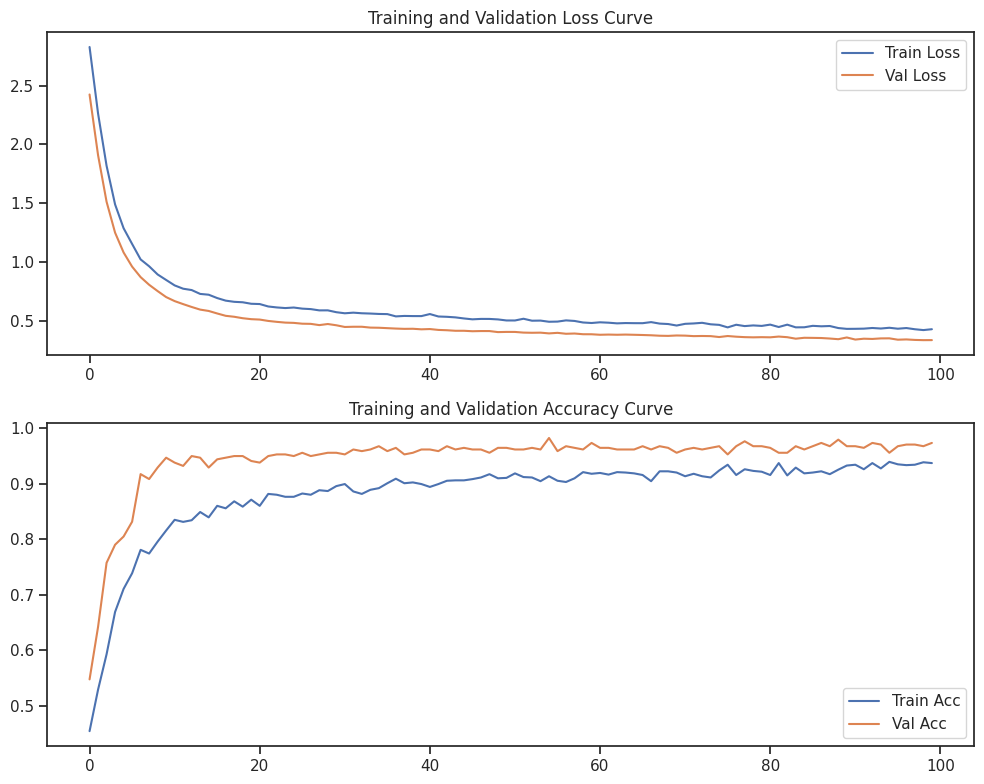

In [62]:
# Plot Training and Validation learning curve
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].set_title('Training and Validation Loss Curve')
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Val Loss')
ax[0].legend()

ax[1].set_title('Training and Validation Accuracy Curve')
ax[1].plot(history.history['accuracy'], label='Train Acc')
ax[1].plot(history.history['val_accuracy'], label='Val Acc')
ax[1].legend()

plt.tight_layout()
plt.show()

In [63]:
# Predict trained model on test dataset
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("Prediciting test set based on trained neural network")
print(f"Accuracy: {accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediciting test set based on trained neural network
Accuracy: 0.9551
